# **EXPOSYS DATA LABS INTERN**
## **Kolluru Sai Venkata Sailesh**




In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
df=pd.read_csv("/content/diabetes.csv")

In [91]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Explaining Attributes from dataset
### Pregnancies    - Number of Pregenancies
### Glucose        - Plasma Glucose concentration in an oral glucose concentration test.
### BloodPressure  -Diastolic Blood Pressure
### Skin           -Triceps skin fold thickness
### Insulin        - 2-Hour serum insulin
### BMI            - Body Mass Index
### DPF            - DiabetesPedigreeFunction
### Age            - Patient Age
### Outcome        - Positive or Negative, 0 represents the person is not diabetic(Negative) and 1 represents that the person is diabetic(Positive).
---



In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **Correlation**

## **r= ( ∑(Xi−X)(Yi−Y) )  /  sqrt( ∑(Xi−X)^2 (Yi−Y)^2 )**
​
 
**where:**
- r=Correlation coefficient
- X =Average of observations of variable X
- Y =Average of observations of variable Y
​


In [93]:
corr_matrix = df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


##### A positive correlation is a relationship between two variables in which both variables move in the same direction
##### Negative correlation is a relationship between two variables in which one variable increases as the other decreases, and vice versa.


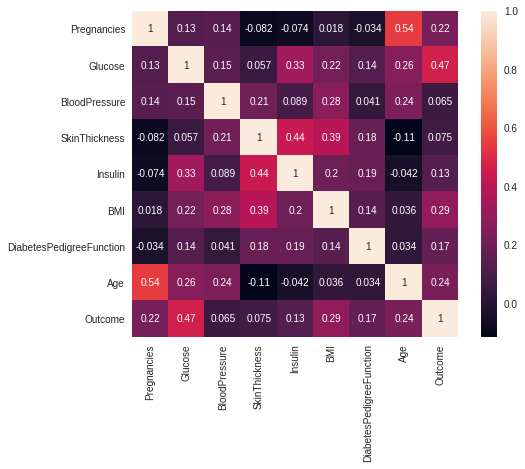

In [94]:
# Correlation Map Using Heat Map
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data=corr_matrix, square=True , annot=True, cbar=True)

In [95]:
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [96]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### **We saw multiple values of data with the .describe( ) method. What caught my attention here was the height of the standard deviations. Because in the column whose average is 50, about half of it, that is 25 standard deviations, there is also the same situation in the annual income. The Age column also has a standard deviation of about 33% compared to the mean.**

In [97]:
(df==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

## **If you observe the zero values in the data set of each column. Glucose, BP, SkinThickness, Insulin, BMI have zeros. Which will gives no meaning. So Let replace those values with the mean of that column.**

In [98]:
col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']

In [99]:
for i in col:
    df[i].replace(0,df[i].mean(),inplace=True)

In [100]:
(df==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [101]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [102]:
df.shape

(768, 9)

In [103]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [104]:
# Let's calculate how mny positive outcomes and negative outcomes

print('Total Negative(0s) Outcomes ',(df['Outcome']==0).sum())
print('Total Positive(1s) Outcomes ',(df['Outcome']==1).sum())

Total Negative(0s) Outcomes  500
Total Positive(1s) Outcomes  268


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



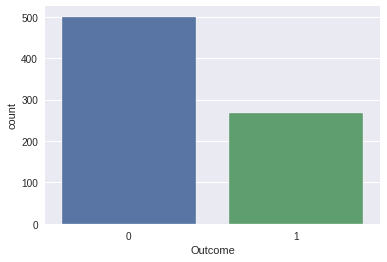

In [105]:
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(df['Outcome'])
plt.show()

In [106]:
df['Outcome'].value_counts()# We can use this also for Calculating different values 

0    500
1    268
Name: Outcome, dtype: int64

In [107]:
import plotly.graph_objects as go

labels = ['Diabetic', 'Non-Diabetic']
percentages = [34.89, 65.10]
fig = go.Figure(data=[go.Pie(labels=labels, values=percentages, pull=[0.05, 0])])
fig.show()

In [108]:
import plotly.express as px
for i in df.columns:
    if i!='Outcome':
        fig = px.box(df, df["Outcome"],y=df[i], color = 'Outcome')
        fig.show()

Column names except for the target column are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

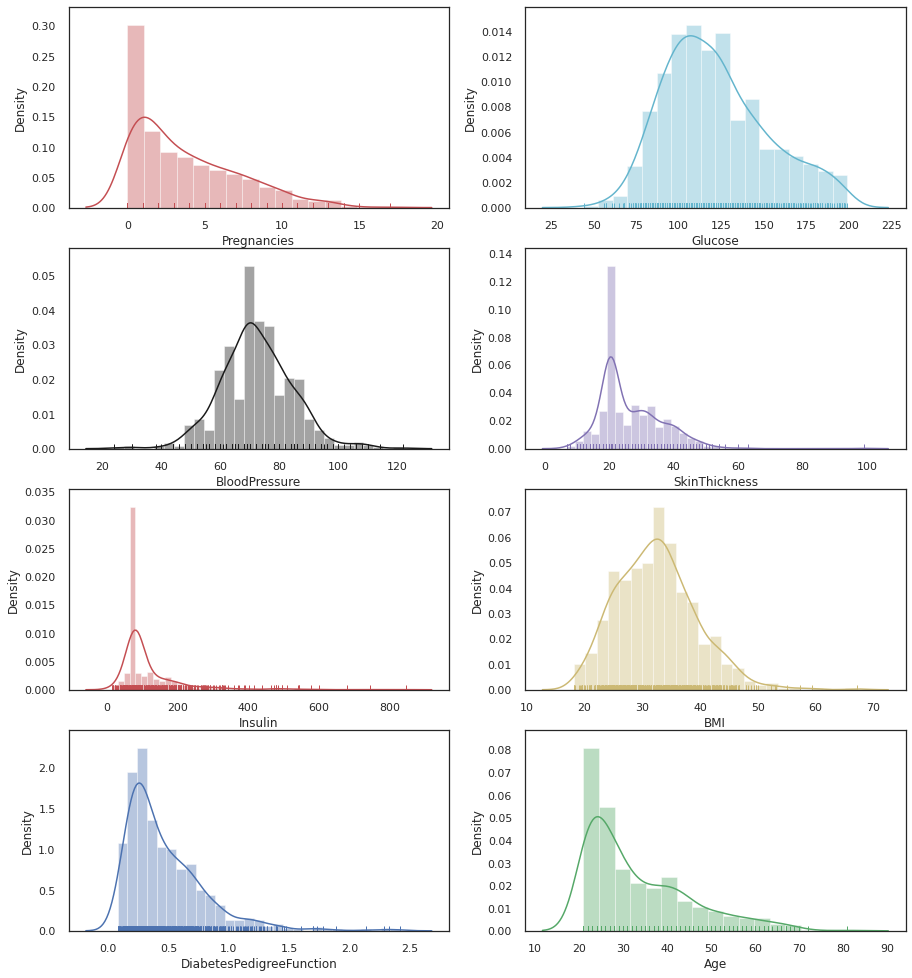

In [109]:
columns=df.columns
columns=list(columns)
columns.pop()
print("Column names except for the target column are :",columns)

#Graphs to be plotted with these colors
colours=['r','c','k','m','r','y','b','g']
sns.set(rc={'figure.figsize':(15,17)})
sns.set_style(style='white')
for i in range(len(columns)):
    
    plt.subplot(4,2,i+1)
    sns.distplot(df[columns[i]], hist=True, rug=True, color=colours[i])

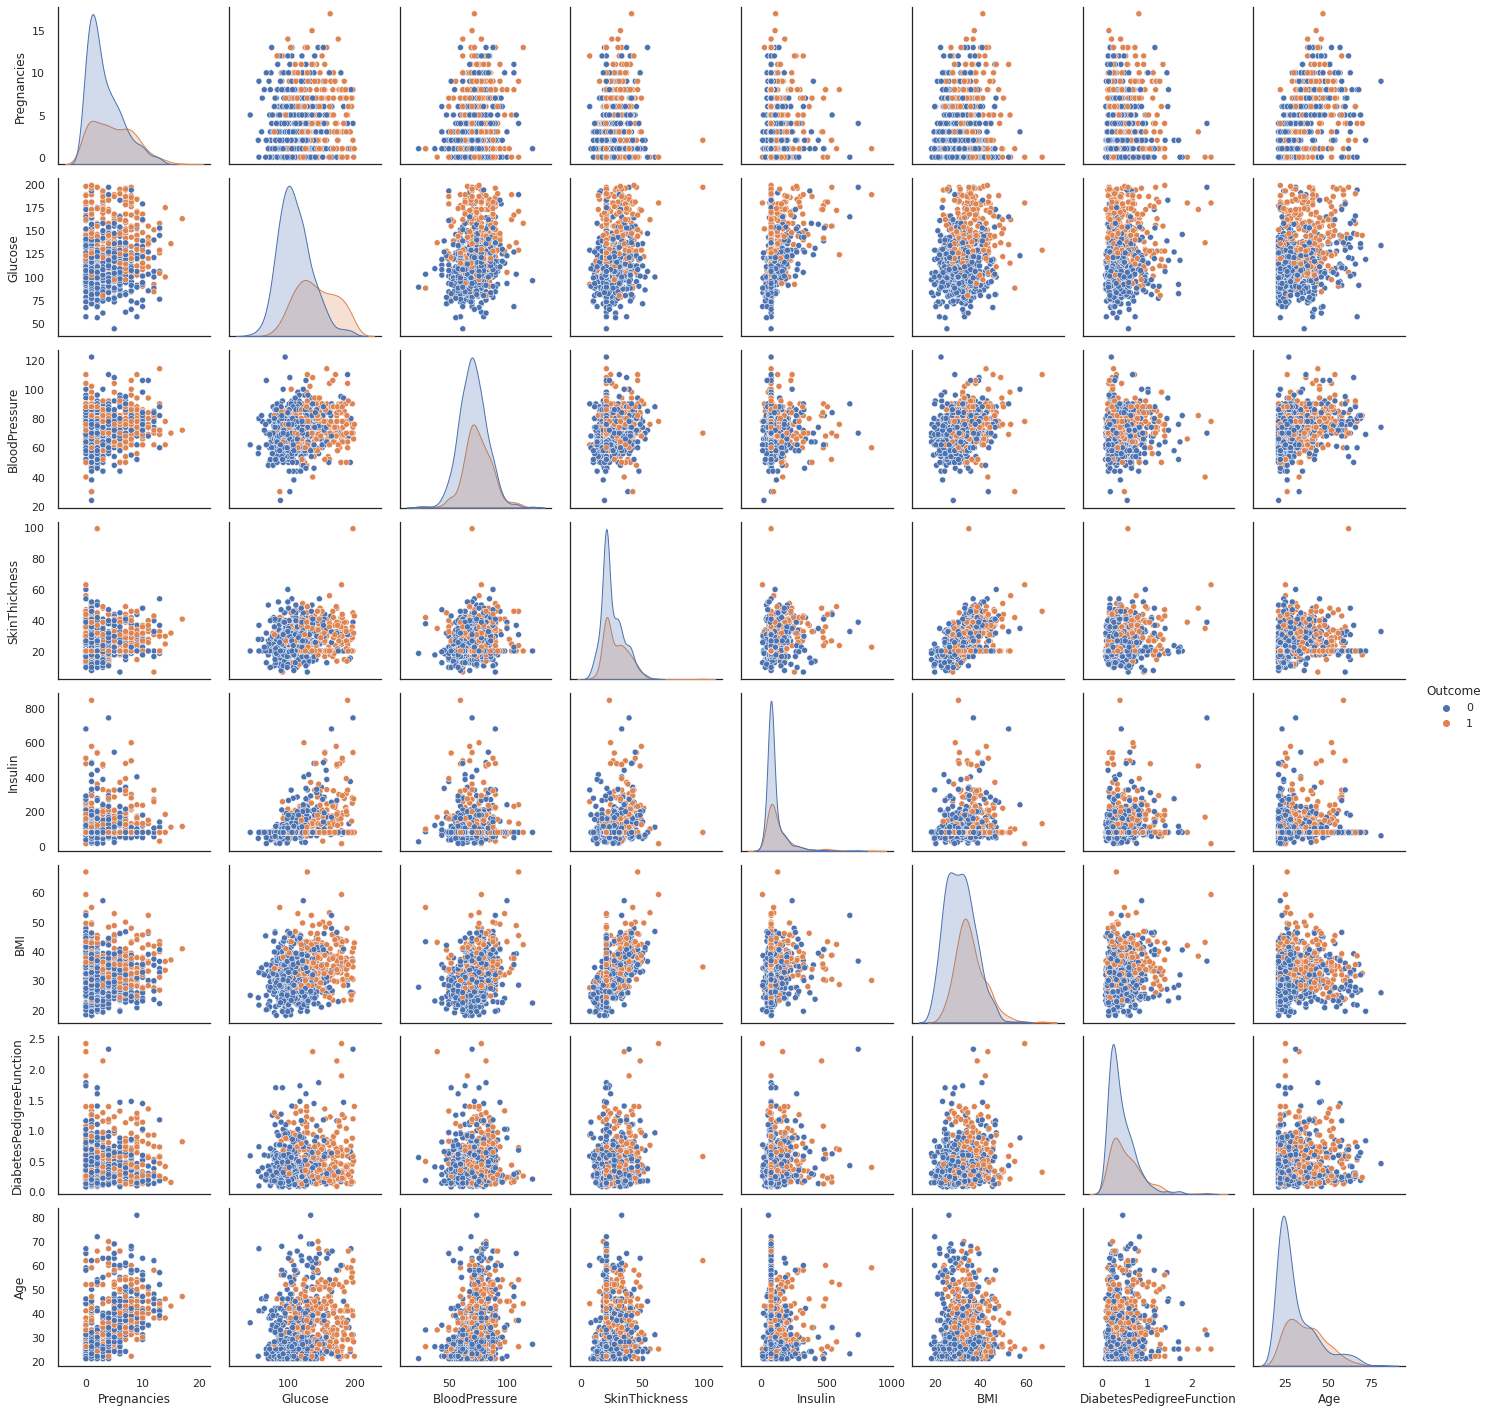

In [110]:
sns.pairplot(df,hue='Outcome')

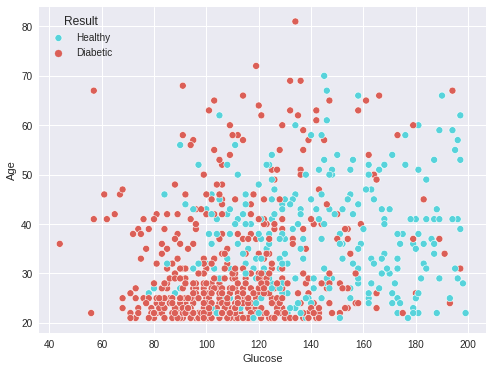

In [111]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x = df['Glucose'], y = df['Age'], hue = df['Outcome'], palette='hls', legend=True)
plt.legend(title='Result', loc='upper left', labels=['Healthy' , 'Diabetic']);

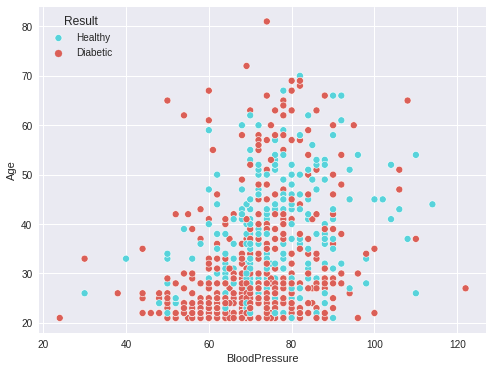

In [112]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x = df['BloodPressure'], y = df['Age'], hue = df['Outcome'], palette='hls', legend=True)
plt.legend(title='Result', loc='upper left',labels=['Healthy' , 'Diabetic']);

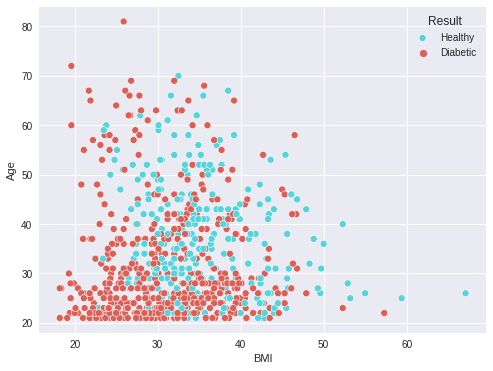

In [113]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x = df['BMI'], y = df['Age'], hue = df['Outcome'], palette='hls', legend=True)
plt.legend(title='Result', labels=['Healthy' , 'Diabetic']);

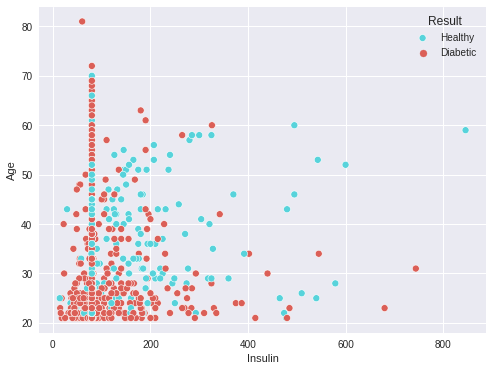

In [114]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x = df['Insulin'], y = df['Age'], hue = df['Outcome'], palette='hls', legend=True)
plt.legend(title='Result', labels=['Healthy' , 'Diabetic']);

In [115]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


#### The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
ss=StandardScaler()
X =  pd.DataFrame(ss.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [118]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496


In [119]:
X=X
y=df['Outcome']

## **Split into train_test_split**

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.3,random_state=3)

In [121]:
All_Accu = []
models = ['Logistic Regression' ,'Decision Tree Classifier' ,'Navie Bayes Classifier' ,'Random Forest Classifier', 
          'AdaBoosting Classifier','GradientBoosting Classifier']

# **Logistic Regression**
##### The logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc.

##### Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [122]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=1,penalty='l2')
LR_model=LR.fit(X_train,Y_train)

LR_pred=LR_model.predict(X_test) #Predicting test set

from sklearn.metrics import accuracy_score
# I am preicting both train and test sets but we will cnsider only test data
print("Train Set Accuracy:"+str(accuracy_score(Y_train,LR.predict(X_train))))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,LR_pred)))
All_Accu.append((accuracy_score(Y_test,LR_pred)))

Train Set Accuracy:0.7877094972067039
Test Set Accuracy:0.7445887445887446


# **Decision Tree**

##### Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [123]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train,Y_train)
ydt_predict = dt_model.predict(X_test)
#ypredict
print('Accuracy with Decision Tree Classifier Algorihm',accuracy_score(Y_test,ydt_predict))
All_Accu.append((accuracy_score(Y_test,ydt_predict)))

Accuracy with Decision Tree Classifier Algorihm 0.6320346320346321


##### In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

[Text(267.4551724137931, 287.4807692307692, 'X[1] <= 0.75\ngini = 0.433\nsamples = 537\nvalue = [367, 170]'),
 Text(129.19211822660097, 264.4823076923077, 'X[1] <= -0.335\ngini = 0.332\nsamples = 428\nvalue = [338, 90]'),
 Text(66.10788177339901, 241.48384615384617, 'X[7] <= -0.659\ngini = 0.181\nsamples = 239\nvalue = [215, 24]'),
 Text(54.425615763546794, 218.48538461538462, 'X[5] <= 1.885\ngini = 0.018\nsamples = 111\nvalue = [110, 1]'),
 Text(50.02758620689655, 195.4869230769231, 'gini = 0.0\nsamples = 110\nvalue = [110, 0]'),
 Text(58.823645320197045, 195.4869230769231, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(77.79014778325123, 218.48538461538462, 'X[4] <= -0.356\ngini = 0.295\nsamples = 128\nvalue = [105, 23]'),
 Text(67.61970443349753, 195.4869230769231, 'X[6] <= 2.142\ngini = 0.208\nsamples = 102\nvalue = [90, 12]'),
 Text(63.22167487684729, 172.48846153846154, 'X[0] <= 2.273\ngini = 0.18\nsamples = 100\nvalue = [90, 10]'),
 Text(47.278817733990145, 149.49, 'X[1] <= -

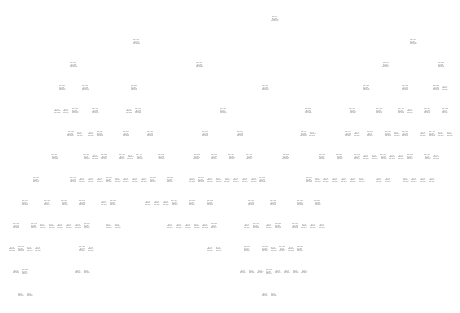

In [124]:
from sklearn import tree
tree.plot_tree(dt_model)

# **Naive Bayes**
##### Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
##### These are collection of classification algorithms based on Bayes Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

In [125]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(X_train,Y_train)
ynb_predict = nb_model.predict(X_test)
#ypredict
print('Accuracy with Gaussian Naive Bayes Algorithm',accuracy_score(Y_test,ynb_predict))
All_Accu.append((accuracy_score(Y_test,ynb_predict)))

Accuracy with Gaussian Naive Bayes Algorithm 0.7359307359307359


# **Random Forest**
##### Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.
##### As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

##### The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.


In [126]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_train,Y_train)
yrf_predict = rf_model.predict(X_test)
#ypredict
print('Accuracy with Gaussian Random Forest Classifier Algorithm',accuracy_score(Y_test,yrf_predict))
All_Accu.append((accuracy_score(Y_test,yrf_predict)))

Accuracy with Gaussian Random Forest Classifier Algorithm 0.7402597402597403


# **Ada Boosting**
##### AdaBoost algorithm, short for Adaptive Boosting, is a Boosting technique that is used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights to incorrectly classified instances. Boosting is used to reduce bias as well as the variance for supervised learning.

In [127]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb_model = adb.fit(X_train,Y_train)
yac_predict = rf_model.predict(X_test)
#ypredict
print('Accuracy with AdaBoost Classifier Algorithm',accuracy_score(Y_test,yac_predict))
All_Accu.append((accuracy_score(Y_test,yac_predict)))

Accuracy with AdaBoost Classifier Algorithm 0.7402597402597403


# **Gradient Boosting**
##### Gradient boosting is a greedy algorithm and can overfit a training dataset quickly. It can benefit from regularization methods that penalize various parts of the algorithm and generally improve the performance of the algorithm by reducing overfitting.

In [128]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb_model = gb.fit(X_train,Y_train)
ygb_predict = gb_model.predict(X_test)
#ypredict
print('Accuracy with GradientBoostingClassifier Algorithm',accuracy_score(Y_test,ygb_predict))
All_Accu.append((accuracy_score(Y_test,ygb_predict)))

Accuracy with GradientBoostingClassifier Algorithm 0.7402597402597403


In [129]:
compare = pd.DataFrame({'Algorithms' : models , 'Accuracy' : All_Accu})
compare.sort_values(by='Accuracy' ,ascending=False)

,Algorithms,Accuracy
0,Logistic Regression,0.744589
3,Random Forest Classifier,0.740260
4,AdaBoosting Classifier,0.740260
5,GradientBoosting Classifier,0.740260
2,Navie Bayes Classifier,0.735931
1,Decision Tree Classifier,0.632035


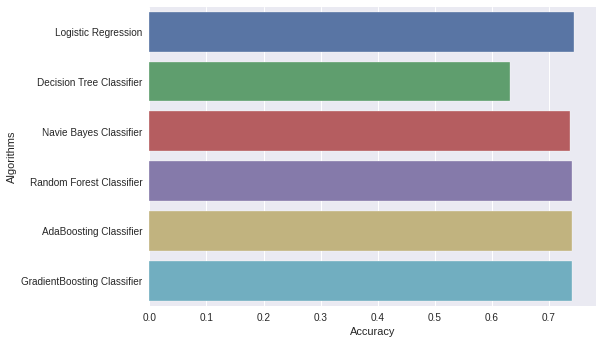

In [130]:
sns.barplot(x='Accuracy' , y='Algorithms' , data=compare)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



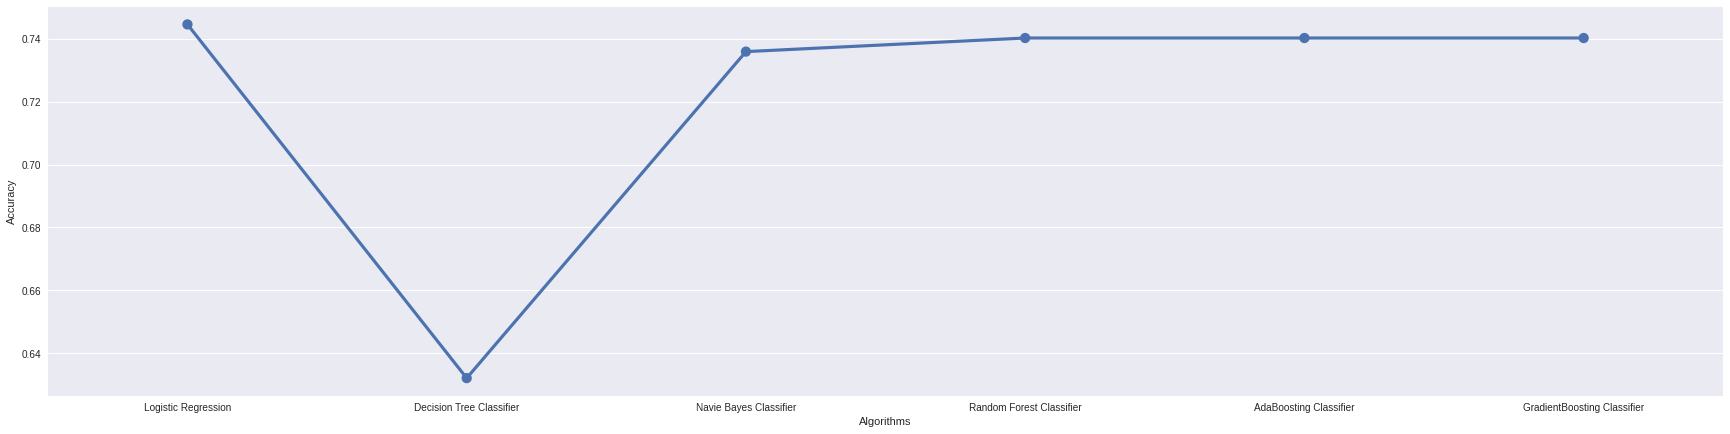

In [131]:
sns.factorplot(x='Algorithms', y='Accuracy' , data=compare, size=6 , aspect=4)

# **Conclusion :**
# We can conclude that Random Forest has highest accuracy because it has highest Accuracy of 74%